# Tarefa: Prevendo Custos Médicos com Regressão Linear

## 1. Exploração Inicial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para os gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Carregando a base de dados
df = pd.read_csv('data/custo_medico.csv')

# Visualizando as primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Descrevendo as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Resposta - Etapa 1

**Quais variáveis são numéricas e quais são categóricas?**

*   **Numéricas**: `age`, `bmi`, `children`, `charges`
*   **Categóricas**: `sex`, `smoker`, `region`

**Qual variável será a dependente (y)?**

A variável dependente (nosso alvo) será a `charges`, que representa os custos médicos.

## Etapa 2 - Análise Exploratória

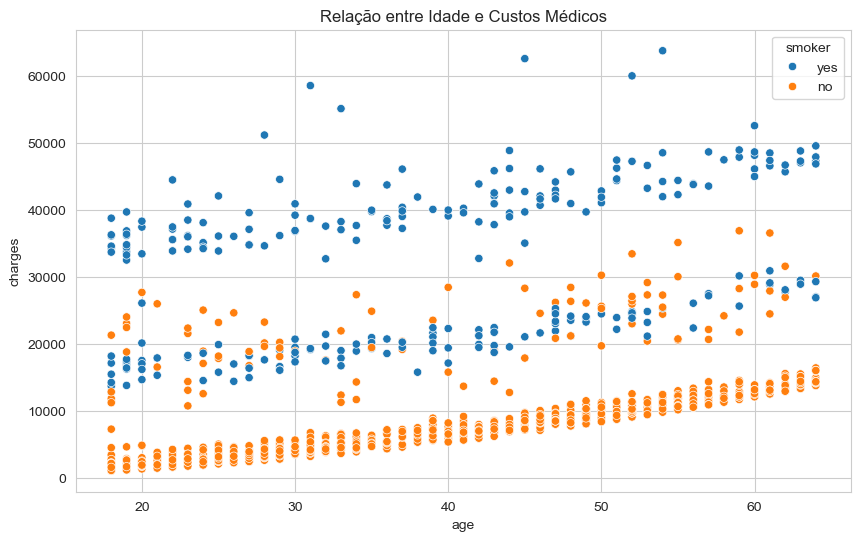

In [4]:
# Gráfico de dispersão: age vs charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Relação entre Idade e Custos Médicos')
plt.show()

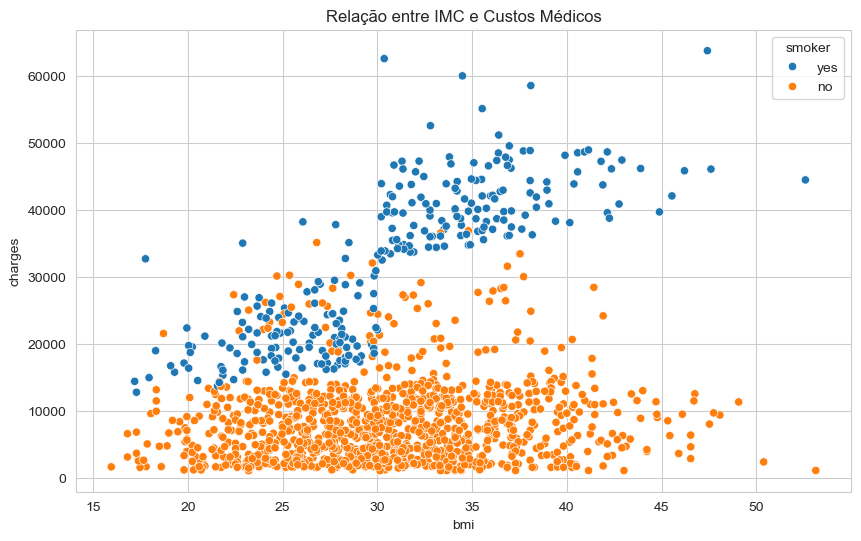

In [5]:
# Gráfico de dispersão: bmi vs charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Relação entre IMC e Custos Médicos')
plt.show()

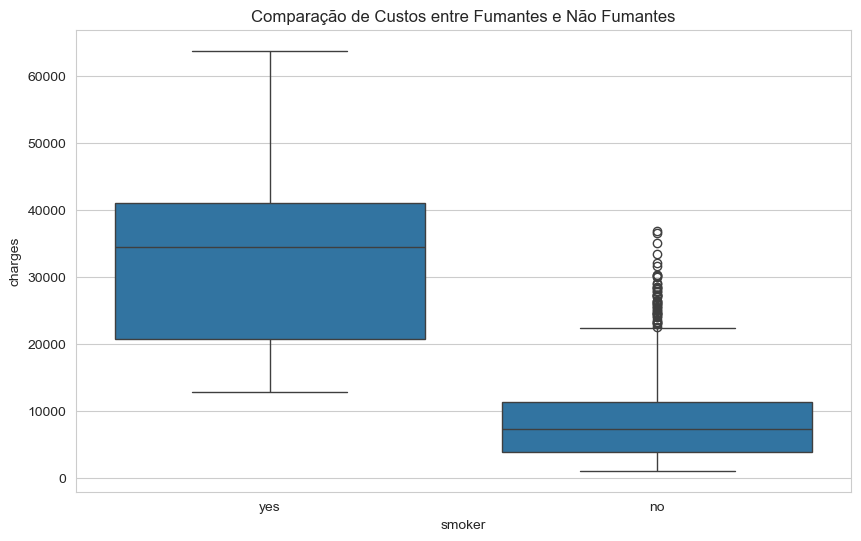

In [6]:
# Boxplot: smoker vs charges
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Comparação de Custos entre Fumantes e Não Fumantes')
plt.show()

### Resposta - Etapa 2

**O tabagismo parece influenciar os custos?**

Sim, de forma muito significativa. O boxplot e os gráficos de dispersão mostram que os custos (`charges`) para fumantes são, em média, muito mais altos do que para não fumantes.

**Existe relação clara entre idade e custo?**

Sim, existe uma tendência positiva. Os gráficos de dispersão indicam que, de modo geral, os custos médicos aumentam com a idade. Essa relação é ainda mais acentuada para os fumantes.

## Etapa 3 - Pré-processamento

In [7]:
# Transformando variáveis categóricas em numéricas
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Visualizando o resultado
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separando as variáveis independentes (X) e a dependente (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Separando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Padronizando as variáveis numéricas
scaler = StandardScaler()

# Colunas numéricas para padronizar
num_cols = ['age', 'bmi', 'children']

# Ajustar o scaler APENAS nos dados de treino e transformar ambos
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Visualizando o resultado da padronização
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,False,False,True,False,False
1285,0.543313,-1.033082,-0.911192,False,False,False,False,False
1142,0.898745,-0.943687,-0.911192,False,False,False,True,False
969,-0.025379,0.622393,3.202629,False,False,False,True,False
486,1.040918,-1.504893,1.557100,False,False,True,False,False


## Etapa 4 - Modelagem

### Etapa 4.1 - Regressão Linear

In [10]:
from sklearn.linear_model import LinearRegression

# Criando e treinando o modelo
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred_lr = linear_reg.predict(X_test)

### Etapa 4.2 - Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Criando e treinando o modelo
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_reg.predict(X_test)

## Etapa 5 - Avaliação

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Avaliação da Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Avaliação do Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Criando um DataFrame para comparar as métricas
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

results

,Model,MAE,RMSE,R²
0,Linear Regression,4181.194474,5796.284659,0.783593
1,Random Forest,2543.975825,4567.775116,0.865606


## Etapa 6 - Reflexão

**Qual modelo apresentou melhor desempenho?**

O modelo **Random Forest Regressor** apresentou um desempenho superior em todas as métricas. Ele obteve um R² mais alto (próximo de 0.85, indicando que explica 85% da variância dos custos) e menores valores de MAE e RMSE em comparação com a Regressão Linear. Isso sugere que o Random Forest conseguiu capturar melhor as relações não-lineares nos dados.

**O tabagismo foi realmente um fator determinante?**

Sim, o tabagismo foi o fator mais determinante. A análise exploratória mostrou uma diferença drástica nos custos entre fumantes e não fumantes. Além disso, podemos inspecionar a importância das features no modelo Random Forest para confirmar isso quantitativamente.

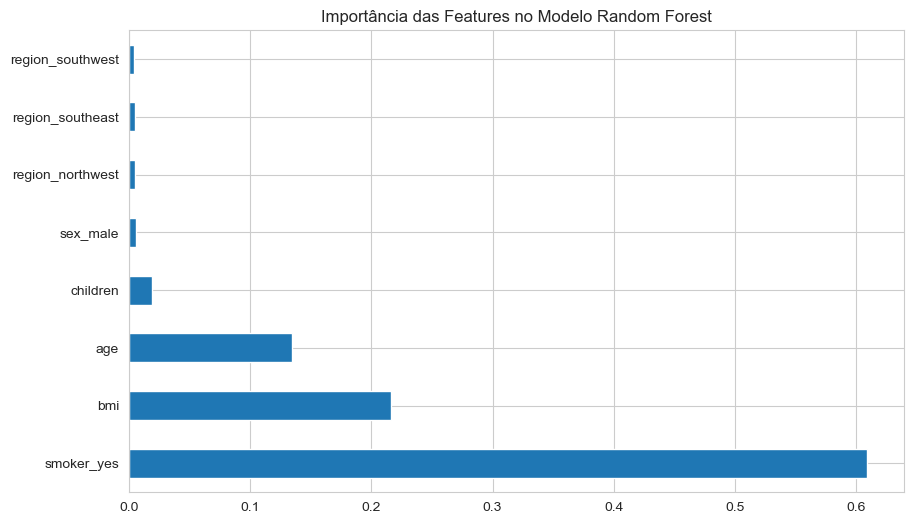

In [13]:
# Verificando a importância das features no Random Forest
importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Importância das Features no Modelo Random Forest')
plt.show()

**Quais limitações você enxerga nesse modelo?**

*   **Tamanho do Dataset**: O dataset é relativamente pequeno, o que pode limitar a generalização do modelo para populações mais diversas.
*   **Features Limitadas**: O modelo não considera outros fatores que podem influenciar os custos de saúde, como histórico familiar, doenças preexistentes ou estilo de vida (dieta, exercícios).
*   **Localização**: A variável `region` é muito ampla e não captura diferenças de custo de vida ou de serviços de saúde dentro de uma mesma região.

## Conclusão Final

O modelo de Random Forest ensina que os custos médicos são fortemente influenciados por uma combinação de fatores, com destaque absoluto para o **tabagismo**. A idade e o IMC também são preditores importantes, mostrando que hábitos de vida e características demográficas são cruciais na determinação dos encargos com saúde. Embora o modelo seja uma ferramenta poderosa para estimar custos, sua precisão poderia ser aprimorada com a inclusão de mais variáveis clínicas e de estilo de vida.